In [1]:
# STEP 1: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# STEP 2: Create books dataset

books = [
    "The Dark Knight Returns",
    "Batman Year One",
    "Sin City Vol 1",
    "Sin City Vol 2",
    "300",
    "Ronin",
    "Daredevil Born Again"
]

prices = [18, 15, 20, 20, 17, 16, 19]

books_df = pd.DataFrame({
    "Book": books,
    "Price (£)": prices
})

books_df


,Book,Price (£)
0,The Dark Knight Returns,18
1,Batman Year One,15
2,Sin City Vol 1,20
3,Sin City Vol 2,20
4,300,17
5,Ronin,16
6,Daredevil Born Again,19


In [3]:
# STEP 3: Create companies dataset

companies_df = pd.DataFrame({

    "Company": ["Waterstones", "WHSmith"],

    "Stores": [317, 320],

    "Profit Margin": [0.12, 0.10],

    "Customer Type": [
        "Collectors, comic fans, students",
        "Commuters, casual readers"
    ]
})

companies_df


,Company,Stores,Profit Margin,Customer Type
0,Waterstones,317,0.12,"Collectors, comic fans, students"
1,WHSmith,320,0.10,"Commuters, casual readers"


In [4]:
# STEP 4: Customer demographics

demographics_df = pd.DataFrame({

    "Age Group": ["13-17", "18-25", "26-35", "36-50", "50+"],

    "Waterstones (%)": [10, 35, 30, 15, 10],

    "WHSmith (%)": [8, 25, 28, 22, 17]

})

demographics_df


,Age Group,Waterstones (%),WHSmith (%)
0,13-17,10,8
1,18-25,35,25
2,26-35,30,28
3,36-50,15,22
4,50+,10,17


In [5]:
# STEP 5: Simulate weekly sales

np.random.seed(1)

sales_data = []

for company in companies_df["Company"]:

    for i in range(len(books)):

        book = books[i]
        price = prices[i]

        if company == "Waterstones":
            units = np.random.randint(50, 150)
            margin = 0.12
        else:
            units = np.random.randint(30, 100)
            margin = 0.10

        revenue = units * price
        profit = revenue * margin

        sales_data.append({

            "Company": company,
            "Book": book,
            "Units Weekly": units,
            "Revenue Weekly (£)": revenue,
            "Profit Weekly (£)": profit
        })

sales_df = pd.DataFrame(sales_data)

sales_df


,Company,Book,Units Weekly,Revenue Weekly (£),Profit Weekly (£)
0,Waterstones,The Dark Knight Returns,87,1566,187.92
1,Waterstones,Batman Year One,62,930,111.60
2,Waterstones,Sin City Vol 1,122,2440,292.80
3,Waterstones,Sin City Vol 2,59,1180,141.60
4,Waterstones,300,125,2125,255.00
5,Waterstones,Ronin,55,880,105.60
6,Waterstones,Daredevil Born Again,129,2451,294.12
7,WHSmith,The Dark Knight Returns,94,1692,169.20
8,WHSmith,Batman Year One,46,690,69.00
9,WHSmith,Sin City Vol 1,31,620,62.00


In [6]:
# STEP 6: Calculate yearly revenue

sales_df["Revenue Yearly (£)"] = sales_df["Revenue Weekly (£)"] * 52

sales_df["Profit Yearly (£)"] = sales_df["Profit Weekly (£)"] * 52

sales_df


,Company,Book,Units Weekly,Revenue Weekly (£),Profit Weekly (£),Revenue Yearly (£),Profit Yearly (£)
0,Waterstones,The Dark Knight Returns,87,1566,187.92,81432,9771.84
1,Waterstones,Batman Year One,62,930,111.60,48360,5803.20
2,Waterstones,Sin City Vol 1,122,2440,292.80,126880,15225.60
3,Waterstones,Sin City Vol 2,59,1180,141.60,61360,7363.20
4,Waterstones,300,125,2125,255.00,110500,13260.00
5,Waterstones,Ronin,55,880,105.60,45760,5491.20
6,Waterstones,Daredevil Born Again,129,2451,294.12,127452,15294.24
7,WHSmith,The Dark Knight Returns,94,1692,169.20,87984,8798.40
8,WHSmith,Batman Year One,46,690,69.00,35880,3588.00
9,WHSmith,Sin City Vol 1,31,620,62.00,32240,3224.00


In [7]:
# STEP 7: Company summary

company_summary = sales_df.groupby("Company").sum()

company_summary


,Book,Units Weekly,Revenue Weekly (£),Profit Weekly (£),Revenue Yearly (£),Profit Yearly (£)
Company,,,,,,
WHSmith,The Dark Knight ReturnsBatman Year OneSin City...,392,6887,688.70,358124,35812.40
Waterstones,The Dark Knight ReturnsBatman Year OneSin City...,639,11572,1388.64,601744,72209.28


In [8]:
# STEP 8: Compare profit

waterstones_profit = company_summary.loc["Waterstones", "Profit Yearly (£)"]

whsmith_profit = company_summary.loc["WHSmith", "Profit Yearly (£)"]

if waterstones_profit > whsmith_profit:

    print("Waterstones makes more profit from Frank Miller books")

else:

    print("WHSmith makes more profit")


Waterstones makes more profit from Frank Miller books


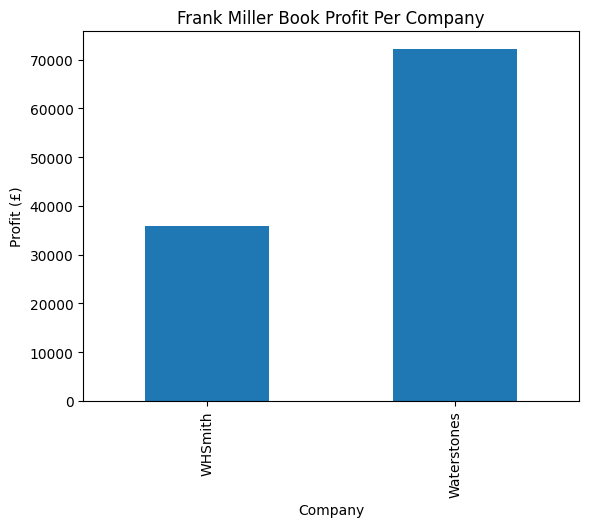

In [9]:
# STEP 9: Graph

company_summary["Profit Yearly (£)"].plot(kind="bar")

plt.title("Frank Miller Book Profit Per Company")

plt.ylabel("Profit (£)")

plt.show()
